# 🚗 Análise Rápida de Heurísticas de Tráfego

Análise comparativa entre diferentes estratégias de controle de semáforos.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

# Configuração para português
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
sns.set_palette("husl")


In [2]:
# Carrega os relatórios
def carregar_relatorios():
    relatorios = []
    arquivos = [
        "relatorios/relatorio_vertical_horizontal_20250930_213119.json",
        "relatorios/relatorio_random_open_close_20250930_213923.json"
    ]
    
    for arquivo in arquivos:
        with open(arquivo, 'r', encoding='utf-8') as f:
            data = json.load(f)
            relatorio = {
                'heuristica': data['simulacao']['heuristica'],
                'veiculos_concluidos': data['metricas']['veiculos_concluidos'],
                'tempo_viagem_medio': data['metricas']['tempo_viagem_medio'],
                'tempo_parado_medio': data['metricas']['tempo_parado_medio'],
                'eficiencia_media': data['metricas']['eficiencia_media'],
                'score_heuristica': data['metricas']['score_heuristica']
            }
            relatorios.append(relatorio)
    
    return pd.DataFrame(relatorios)

df = carregar_relatorios()
df


,heuristica,veiculos_concluidos,tempo_viagem_medio,tempo_parado_medio,eficiencia_media,score_heuristica
0,VERTICAL_HORIZONTAL,828,50.953362,15.050302,70.462593,20.0
1,RANDOM_OPEN_CLOSE,719,48.417014,12.571511,74.034931,20.0


In [3]:
# Análise de Insights
print("🔍 INSIGHTS PRINCIPAIS")
print("=" * 40)

# Melhor throughput
df['veiculos_por_minuto'] = df['veiculos_concluidos'] / 200  # 200 segundos
melhor_throughput = df.loc[df['veiculos_por_minuto'].idxmax()]
print(f"🏆 Melhor throughput: {melhor_throughput['heuristica']} ({melhor_throughput['veiculos_por_minuto']:.1f} veículos/min)")

# Melhor eficiência
melhor_eficiencia = df.loc[df['eficiencia_media'].idxmax()]
print(f"⚡ Maior eficiência: {melhor_eficiencia['heuristica']} ({melhor_eficiencia['eficiencia_media']:.1f}%)")

# Menor tempo de viagem
menor_tempo = df.loc[df['tempo_viagem_medio'].idxmin()]
print(f"⏱️ Menor tempo de viagem: {menor_tempo['heuristica']} ({menor_tempo['tempo_viagem_medio']:.1f}s)")

# Menor congestionamento
menor_congestionamento = df.loc[df['tempo_parado_medio'].idxmin()]
print(f"🚦 Menor congestionamento: {menor_congestionamento['heuristica']} ({menor_congestionamento['tempo_parado_medio']:.1f}s parado)")


🔍 INSIGHTS PRINCIPAIS
🏆 Melhor throughput: VERTICAL_HORIZONTAL (4.1 veículos/min)
⚡ Maior eficiência: RANDOM_OPEN_CLOSE (74.0%)
⏱️ Menor tempo de viagem: RANDOM_OPEN_CLOSE (48.4s)
🚦 Menor congestionamento: RANDOM_OPEN_CLOSE (12.6s parado)


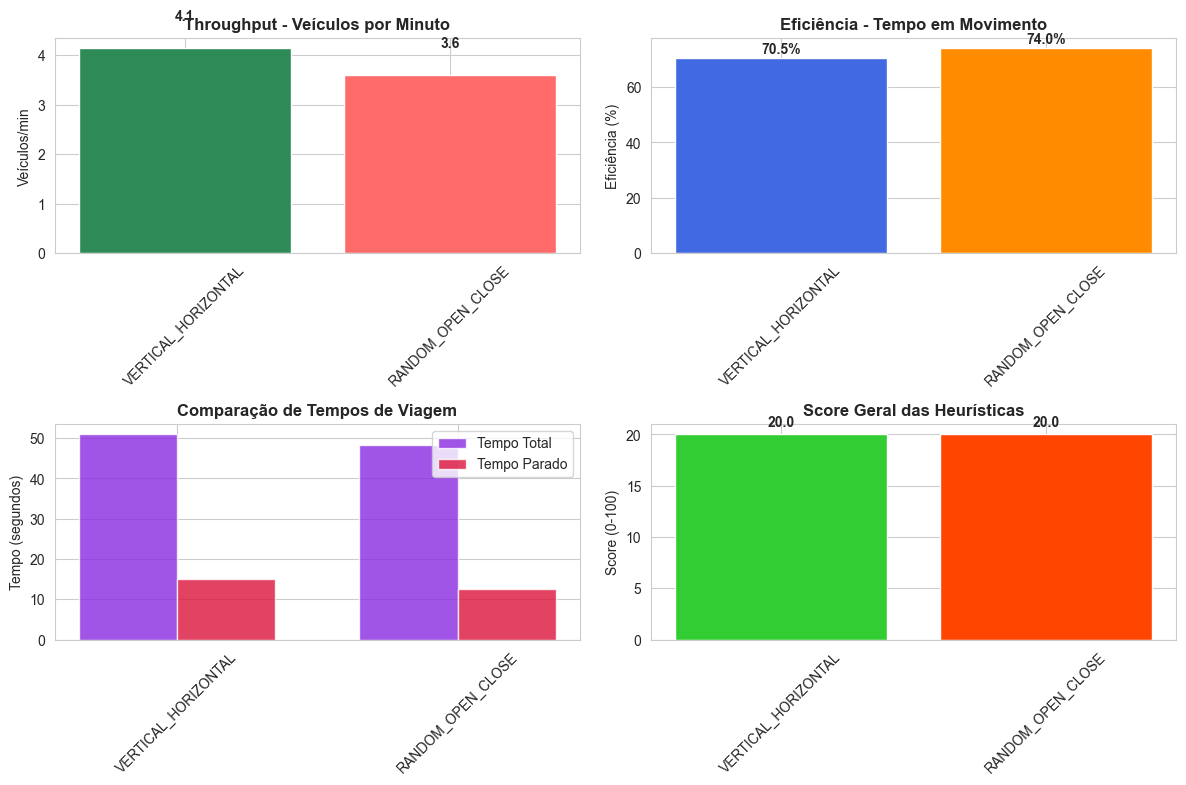

In [4]:
# Gráfico 1: Comparação de Throughput
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
bars = plt.bar(df['heuristica'], df['veiculos_por_minuto'], color=['#2E8B57', '#FF6B6B'])
plt.title('Throughput - Veículos por Minuto', fontweight='bold')
plt.ylabel('Veículos/min')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Eficiência
plt.subplot(2, 2, 2)
bars = plt.bar(df['heuristica'], df['eficiencia_media'], color=['#4169E1', '#FF8C00'])
plt.title('Eficiência - Tempo em Movimento', fontweight='bold')
plt.ylabel('Eficiência (%)')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Tempo de Viagem vs Parado
plt.subplot(2, 2, 3)
x = np.arange(len(df))
width = 0.35
plt.bar(x - width/2, df['tempo_viagem_medio'], width, label='Tempo Total', color='#8A2BE2', alpha=0.8)
plt.bar(x + width/2, df['tempo_parado_medio'], width, label='Tempo Parado', color='#DC143C', alpha=0.8)
plt.title('Comparação de Tempos de Viagem', fontweight='bold')
plt.ylabel('Tempo (segundos)')
plt.xticks(x, df['heuristica'], rotation=45)
plt.legend()

# Gráfico 4: Score das Heurísticas
plt.subplot(2, 2, 4)
bars = plt.bar(df['heuristica'], df['score_heuristica'], color=['#32CD32', '#FF4500'])
plt.title('Score Geral das Heurísticas', fontweight='bold')
plt.ylabel('Score (0-100)')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
